In [1]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl

pi = np.pi

In [33]:
wp = 2*pi*100
rp = 0.9

ws = 2*pi*200
rs = 0.1

N = (np.log10(((1/rp**2)-1)/((1/rs**2)-1)))/(2*np.log10(wp/ws))
N = int(np.ceil(N))
print(N)

p1 = rp**2
p2 = 1/p1
wc = wp*(1/(p2-1))**(1/(2*N))

print(wc)

5
231.20814931947567


ATIVIDADE 8

In [77]:
# Criando o sinal

fs = 10000
ts = 1/fs
t = np.arange(0, 2, ts)

m = 1.5*np.cos(2*pi*100*t)+1*np.cos(2*pi*500*t)+2*np.cos(2*pi*800*t)+3*np.cos(2*pi*1200*t)


[7.5        6.38761585 3.55721419 ... 0.2745252  3.55721419 6.38761585]


345.0612875712259
2168.0840121439965
[np.complex128(-1084.0420060719978+1877.6158320555905j), np.complex128(-2168.0840121439965+2.6551371457546963e-13j), np.complex128(-1084.0420060719991-1877.6158320555899j)]
<TransferFunction>: sys[202]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                  s^3
----------------------------------------
s^3 + 4336 s^2 + 9.401e+06 s + 1.019e+10

<TransferFunction>: sys[202]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.8054 z^3 - 2.416 z^2 + 2.416 z - 0.8054
-----------------------------------------
   z^3 - 2.569 z^2 + 2.226 z - 0.6487

dt = 0.0001



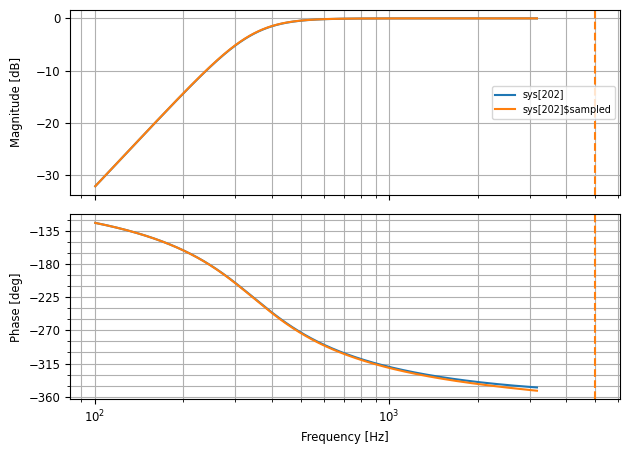

In [178]:
# Com os valores do diagrama:

ws = 100*2*pi
wp = 500*2*pi
rp = 0.95
rs = 0.1

# Calculo da ordem

p1 = (1/(rp**2))-1
s1 = (1/(rs**2))-1
numN = np.log10(p1/s1)
denN = 2*np.log10(wp/ws)
N = numN/denN

# N = -2.11, então, assumir N = 3

N = -3
wc = wp*(1/p1)**(1/(2*N))
print(wc/(2*pi))
print(wc)
# Calculando os polos

N = 3

k = np.arange(0, 2*N)
polos = wc*np.exp((1j*pi/(2*N))*(2*k+N-1))

# Retirando os polos estaveis
 
POLOS = [p for p in polos if np.real(p)<0]
print(POLOS)

# Montando a função de tranferência continua

log = np.logspace(2.8,4.3, 10000)

denS = np.poly(POLOS)
Hs = ctl.tf([1,0,0,0], denS)
print(Hs)
plt.figure()
ctl.bode(Hs, dB = True, Hz = True, omega = log)
Hzbi = ctl.c2d(Hs, ts, method = 'tustin')
print(Hzbi)
ctl.bode(Hzbi, dB = True, Hz = True, omega = log)

<TransferFunction>: sys[198]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.8054 z^3 - 2.416 z^2 + 2.416 z - 0.8054
-----------------------------------------
   z^3 - 2.569 z^2 + 2.226 z - 0.6487

dt = 0.0001

(0.805421938489812+0j)
(-2.4162658154694343+0j)
(2.4162658154694325+0j)
(-0.8054219384898103+0j)


(-2.568880171361905+0j)
(2.2257918903018514+0j)
(-0.6487034462547422+0j)


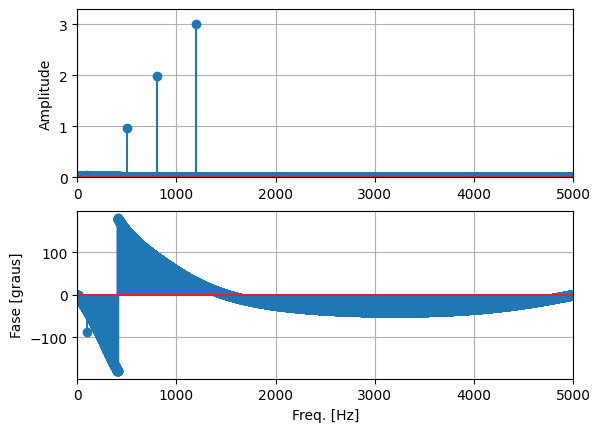

(array([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 9.9985e+03, 9.9990e+03,
        9.9995e+03]),
 array([1.39538954e-02, 2.79077884e-02, 2.79077816e-02, ...,
        8.84614475e-05, 8.84613962e-05, 8.84613655e-05]),
 array([-0.        , -0.18954299, -0.37908635, ..., -0.06704397,
        -0.044696  , -0.022348  ]),
 <Axes: ylabel='Amplitude'>,
 <Axes: xlabel='Freq. [Hz]', ylabel='Fase [graus]'>)

In [165]:
# retirando os coeficientes

from espectro import espectro1D

print(Hzbi)
num, den = ctl.tfdata(Hzbi)
num = num[0][0]
den = den[0][0]

print(num[0])
print(num[1])
print(num[2])
print(num[3])
print('\n')

print(den[1])
print(den[2])
print(den[3])


y=np.zeros(len(m))

y[0] = 0.805421938489812*m[0]
y[1] = 0.805421938489812*m[1]-2.4162658154694343*m[0]+2.568880171361905*y[0]
y[2] = 0.805421938489812*m[2]-2.4162658154694343*m[1]+2.4162658154694325*m[0]+2.568880171361905*y[1]-2.2257918903018514*y[0]
y[3] = 0.805421938489812*m[3]-2.4162658154694343*m[2]+2.4162658154694325*m[1]-0.8054219384898103*m[0]+2.568880171361905*y[1]-2.2257918903018514*y[0]+0.6487034462547422*y[0]
for k in range(4,len(m)):
    y[k]= 0.805421938489812*m[k]-2.4162658154694343*m[k-1]+2.4162658154694325*m[k-2]-0.8054219384898103*m[k-3]+2.568880171361905*y[k-1]-2.2257918903018514*y[k-2]+0.6487034462547422*y[k-3]

espectro1D(y, fs, 1)

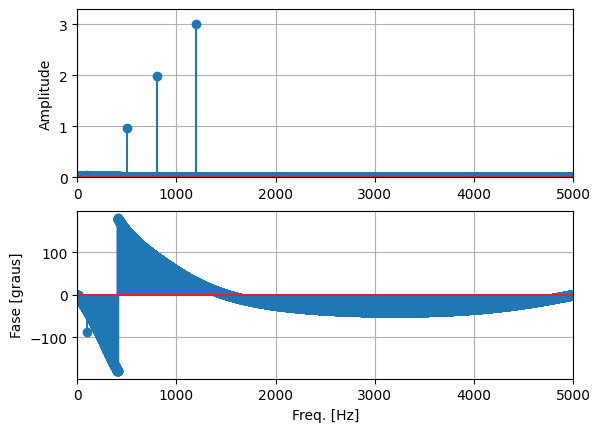

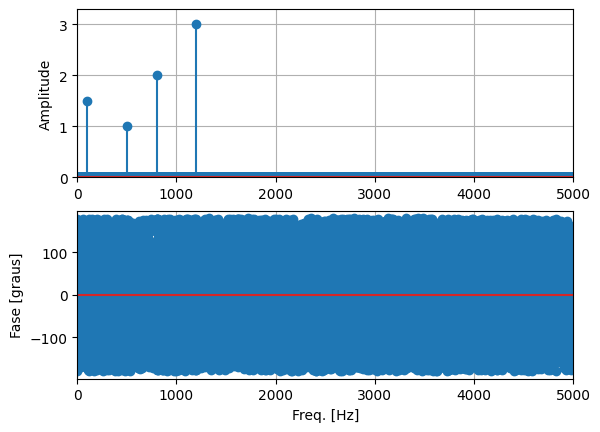

<StemContainer object of 3 artists>

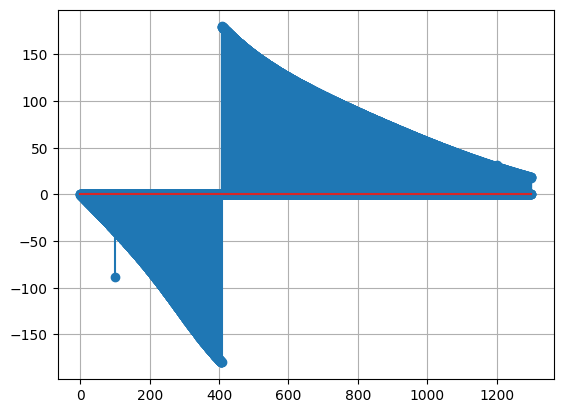

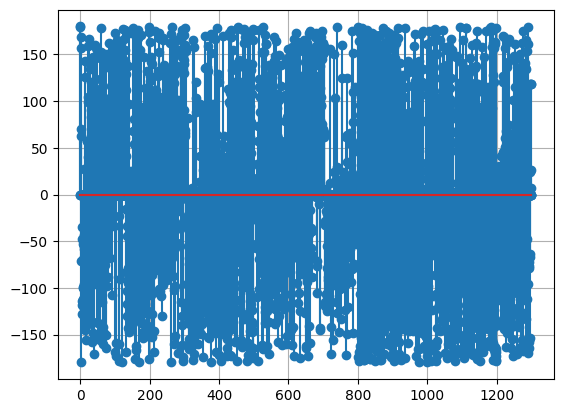

In [184]:
def func (m):
    
    y=np.zeros(len(m))

    y[0] = 0.805421938489812*m[0]
    y[1] = 0.805421938489812*m[1]-2.4162658154694343*m[0]+2.568880171361905*y[0]
    y[2] = 0.805421938489812*m[2]-2.4162658154694343*m[1]+2.4162658154694325*m[0]+2.568880171361905*y[1]-2.2257918903018514*y[0]
    y[3] = 0.805421938489812*m[3]-2.4162658154694343*m[2]+2.4162658154694325*m[1]-0.8054219384898103*m[0]+2.568880171361905*y[1]-2.2257918903018514*y[0]+0.6487034462547422*y[0]
    for k in range(4,len(m)):
        y[k]= 0.805421938489812*m[k]-2.4162658154694343*m[k-1]+2.4162658154694325*m[k-2]-0.8054219384898103*m[k-3]+2.568880171361905*y[k-1]-2.2257918903018514*y[k-2]+0.6487034462547422*y[k-3]

    espectro1D(y, fs, 1)
    espectro1D(m, fs, 1)
    return y

u = func(m)

#DFT do sinal
N = len(u)
S = np.fft.fft(u)
df = fs/N
f = np.arange(0, fs, df)



plt.figure(2)
plt.clf()
plt.stem(f[0:2600], 2*abs(S[0:2600])/N)
plt.grid()
Fase = (np.angle( S[0:int(np.floor(N/2))] ) )*180/pi
plt.stem( f[0:2600], Fase[0:2600])

N = len(m)
S = np.fft.fft(m)
df = fs/N
f = np.arange(0, fs, df)

plt.figure(3)
plt.stem(f[0:2600], 2*abs(S[0:2600])/N)
plt.grid()

Fase = (np.angle( S[0:int(np.floor(N/2))] ) )*180/pi
plt.stem( f[0:2600], Fase[0:2600])
